# Legge di Lambert - Beer

**Informazioni generali.** Misure e caratterizzazioni di una serie di led e costruzione di uno spettro

Dettagli del setup:
* Circuito giratore come rimpiazzo di induttore in HPF RLC
* Realizzazione di oscillatore risonante e miglioramento del fattore di qualità Q
* Realizzazione di filtro notch con OpAmp agente da compontente passivo

## Informazioni su OpAmp ADA4661
Corrente max di Output = 40mA
Tutti i led a nostra disposizione sostengono una corrente di max 20mA
La resistenza scelta è quella da $\sim 470\Omega$ 
quindi scegliamo un voltaggio di ingresso dell ad2 di $V_{in} = \frac{R}{I} \sim 470[\Omega] 20[mA] \sim9.4V$

Verifica massima corrente alimentazione del led
abbiamo scelto di alimentare 

| Colore | Voltaggio a cui è alimentato [V] |
| :-: | :-: |
| rosso | 2.9 |
| arancione | 2.9 |
| giallo | 2.7 |
| verde | 2.3 |
| blu | 2.0 |
| viola | 1.8 |

errore 0.1V su tutti i dati sopra

resistenza di feedback $100.26k\Omega$



Considerando la figura le misure di due cuvette sono
larghezza in alto 12.4, 12.45
larghezza in basso 11.90, 12.00
spessore interno 10.4, 10.4




riempiamo 5 cuvette con concentrazioni crescenti di liquido blu, rispettivamente 0% (acqua pura), 25%, 50%, 75%, 100%.
inseriamo le cuvette con i lati piatti rivolti verso led e fotodiodo e quelli zigrinati verso l esterno.

Dati salvati nel seguente modo
cartella con xx% concentrazione
dentro data001-006 sono i colori

resistenza per rosso-arancione-giallo $221.72k\Omega$
resistenza per verde-blu = $100.3k\Omega$
resistenza per viola = $22.131 \mathrm{k\Omega} $





















		




0


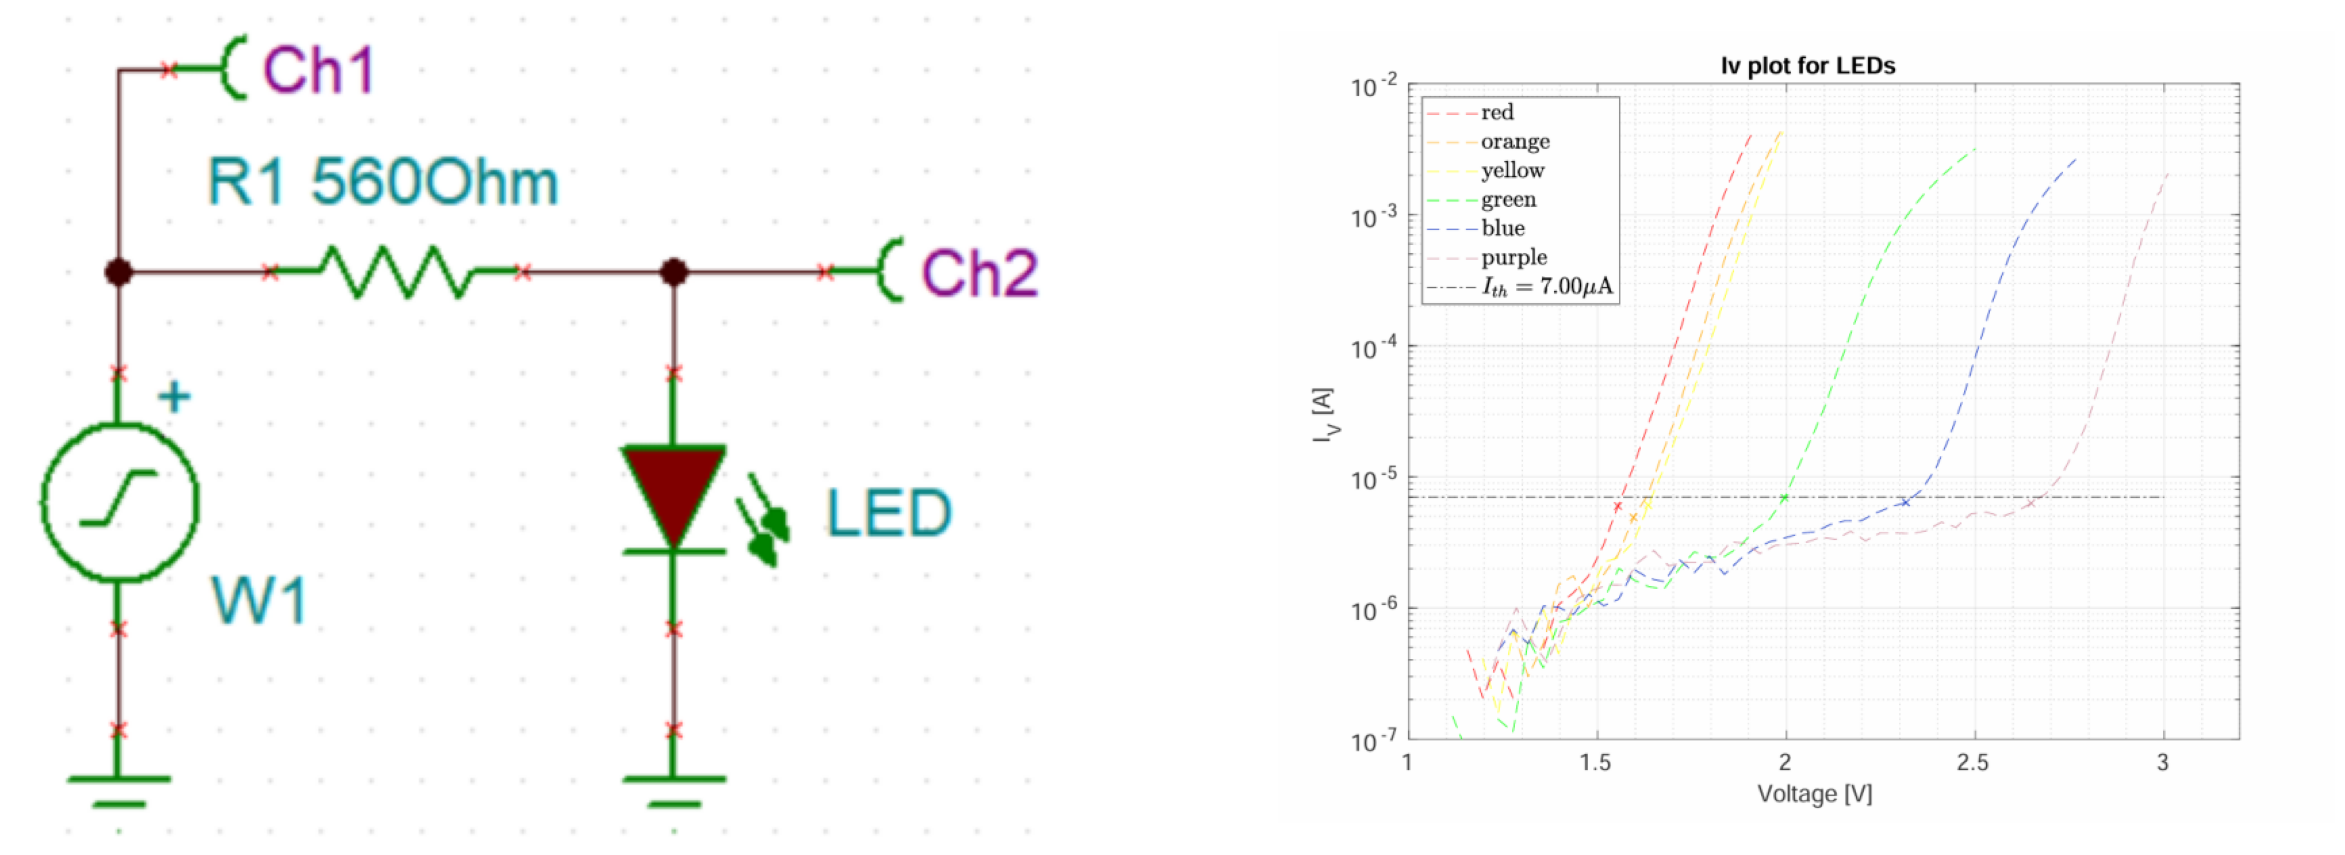

In [ ]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            axes[i].imshow(imgList[i])
            axes[i].axis('off')
        else:
            for j in range(cols):
                axes[i][j].imshow(imgList[i*cols+j])
                axes[i][j].axis('off')
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/Screenshot/Circuito_led.png', 'Media/Screenshot/LED_zoom.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


 A partire dagli spettri dei vari LED si sono determinate la lunghezza d’onda media e la sua incertezza trattando lo spettro dell’intensità di emissione come una distribuzione e l incertezza come la deviazione standard della distribuzione stessa. Si è inoltre eliminato un offset di $\sim 1500$ sull intensità per fittare corretamente la distribuzone.
 



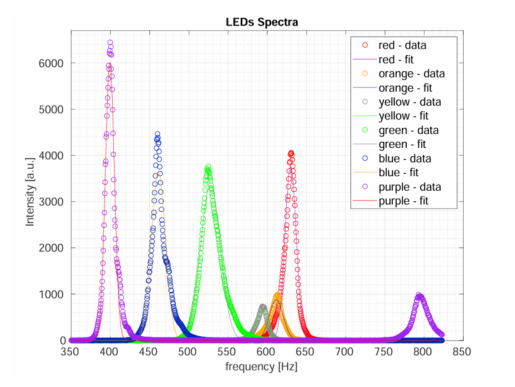

In [ ]:
pdfList = ['Media/Spectra.pdf]
rows = 1
cols = 1
display_pdfs_side_by_side(rows, cols, pdfList)

|           |	Frequenza media | Deviazione standard |
| :-: | :-: | :-: |
|rosso		| 629.6702 | 7.1507 |			
|arancione  | 611.3691 | 8.8193 |					
|giallo 	| 593.5095 | 6.9178 |				
|verde		| 527.4875 | 12.6300 |			
|azzurro	| 461.0542 | 8.8989 |				
|viola		| 399.2358 | 5.7620 |



In [8]:
pdfList = ['Media/RLC/simulationRLCEquivalent.pdf', 'Media/RLC/simulationRLC.pdf']
cols  = 2
rows = 1
display_pdfs_side_by_side(rows, cols, pdfList)

FileNotFoundError: no such file: 'Media/RLC/simulationRLCEquivalent.pdf'

Questo circuito quindi è stato poi analizzato  in dominio del tempo e delle frequenze, ottenendo per le frequenze una risonanza dovuta all'interazione tra induttore e condensatore mentre, nel dominio del tempo, si troveranno delle oscillazioni smorzate

0


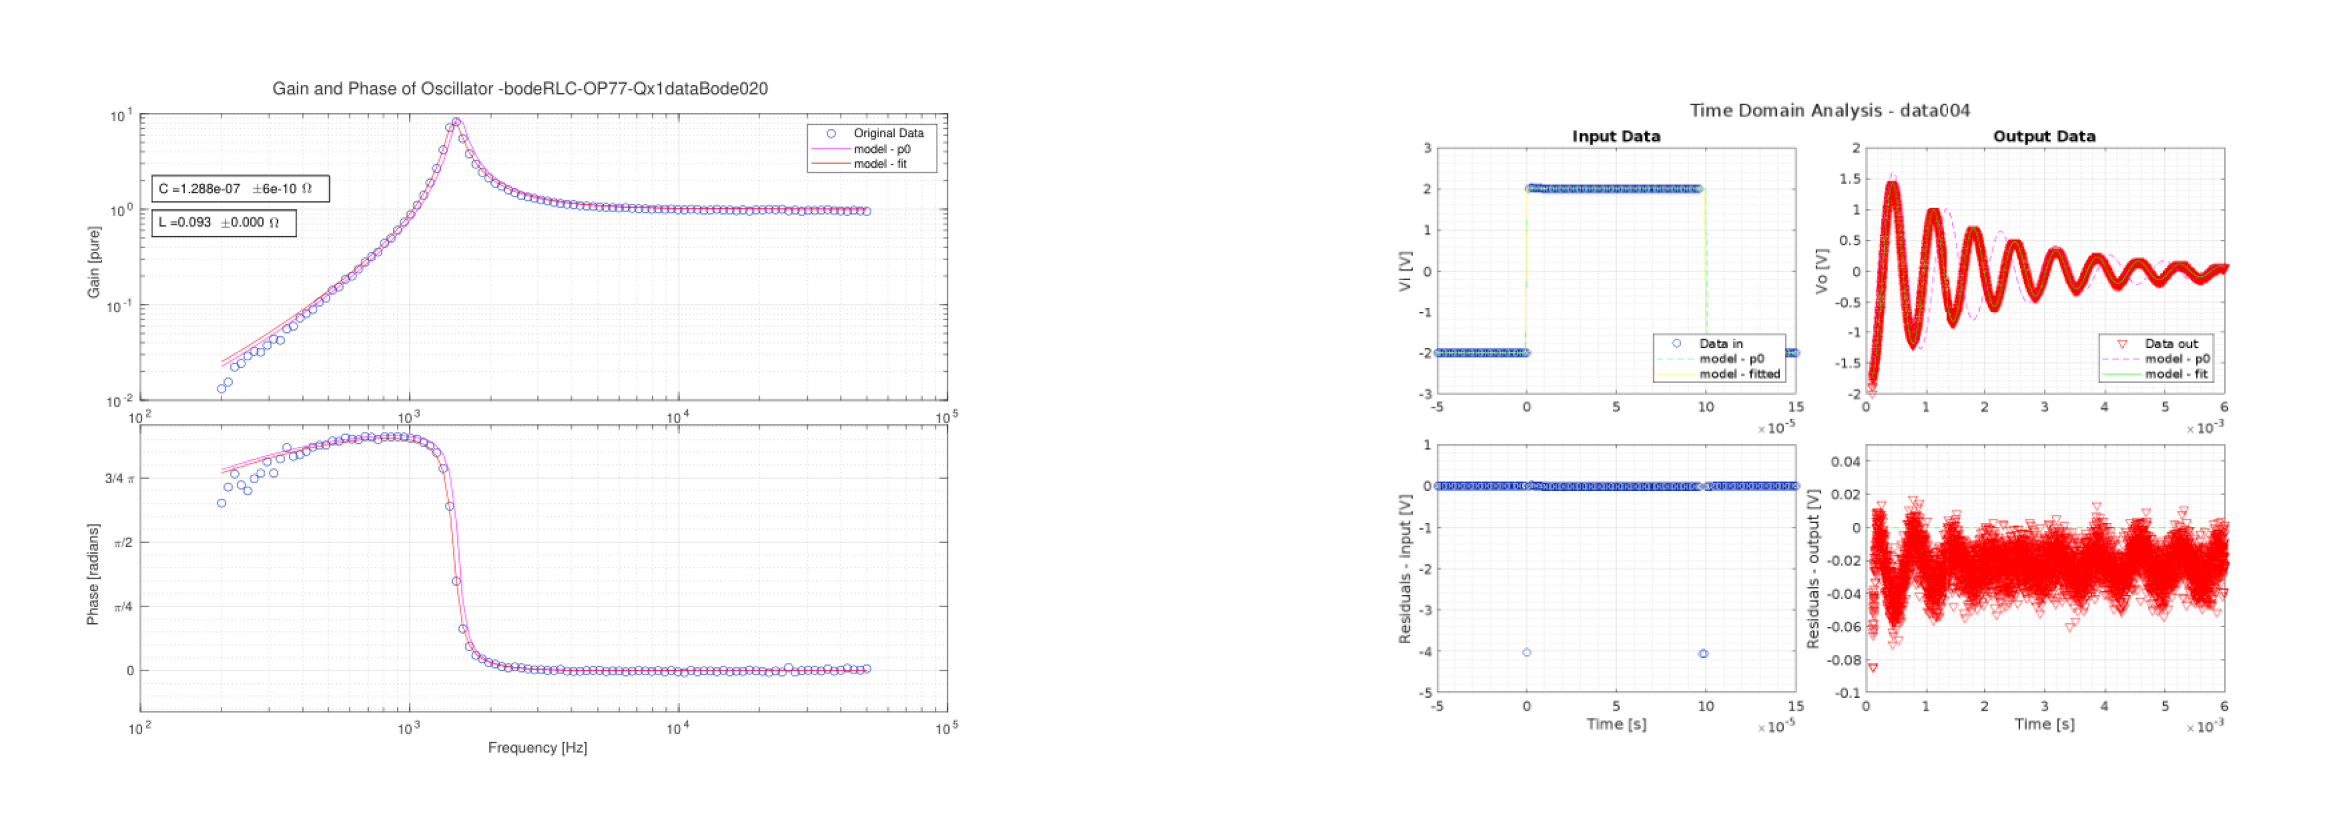

In [ ]:
pdfList = ['Media/RLC/bodeRLC-OP77-Qx1dataBode020.pdf', 'Media/RLC/tda-data004.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Si osservano facilmente sia il comportamento con presenza di risonanza quanto le oscillazioni smorzate in uscita all'oscillatore analizzato in dominio del tempo.

## Fattore di qualità
Ogni oscillatore è definito, tra i vari parametri, dal Fattore di Qualità, definito come il rapporto tra $\alpha$ e $\omega_0$ dell'equazione differenziale, che rappresenta le perdite dell'oscillatore.
Questo parametro può essere migliorato senza variare la frequenza di risonanza modificando capacità e induttanza, specificamente per raddoppiare il fattore di qualità è necessario contemporaneamente dimezzare la capacità e raddoppiare l'induttanza, si è effettuata questa modifica due volte di fila ottenendo circuiti con fattori di qualità doppi e quadrupli rispetto al valore originale, le analisi in frequenza di tali circuiti vengono quivi riportate.

0


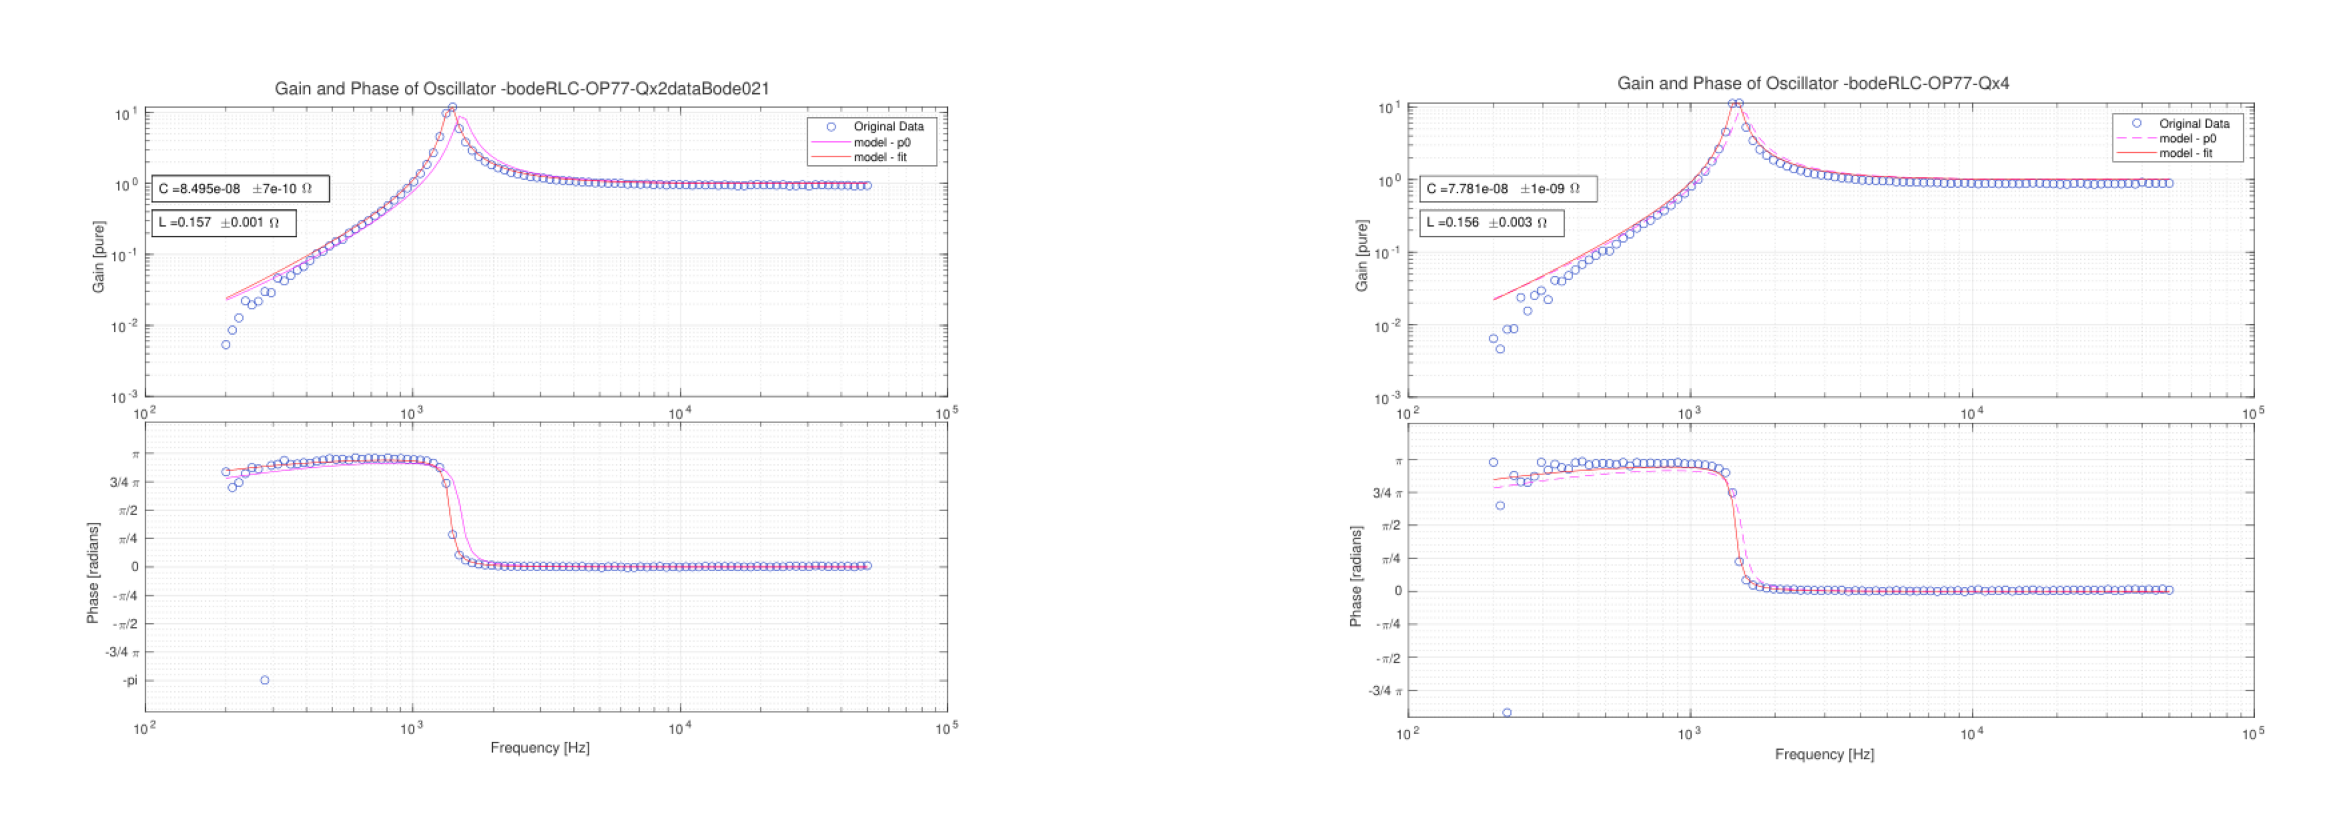

In [ ]:
cols = 2
rows = 1
pdfList = ['Media/RLC/bodeRLC-OP77-Qx2dataBode021.pdf', 'Media/RLC/bodeRLC-OP77-Qx4.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

## Notch
Si può facilmente modificare il circuito appena visto, nominalmente scambiando condensatore e resistore, per ottenere un filtro notch, o eliminabanda.
Questo tipo di filtri sfrutta la risonanza di condensatore e induttore per ridurre l'impedenza della loro serie attorno la frequenza di risonanza in maniera tale da ottenere un guadagno, dato dal partitore tra resistenza e impedenza di serie, tendente a 0 per una piccola finestra di frequenze.
Tuttavia la presenza di un resistore interno al giratore completamente non trascurabile, essendo il suo valore comparabile con quello del resistore esterno, si avrà che il guadagno non scende mai particolarmente negativo e invece avrà semplicemente un minimo, ben fittabile tramite modello che considera la resistenza di serie.

Le osservazioni sono riportate di seguito. 

0


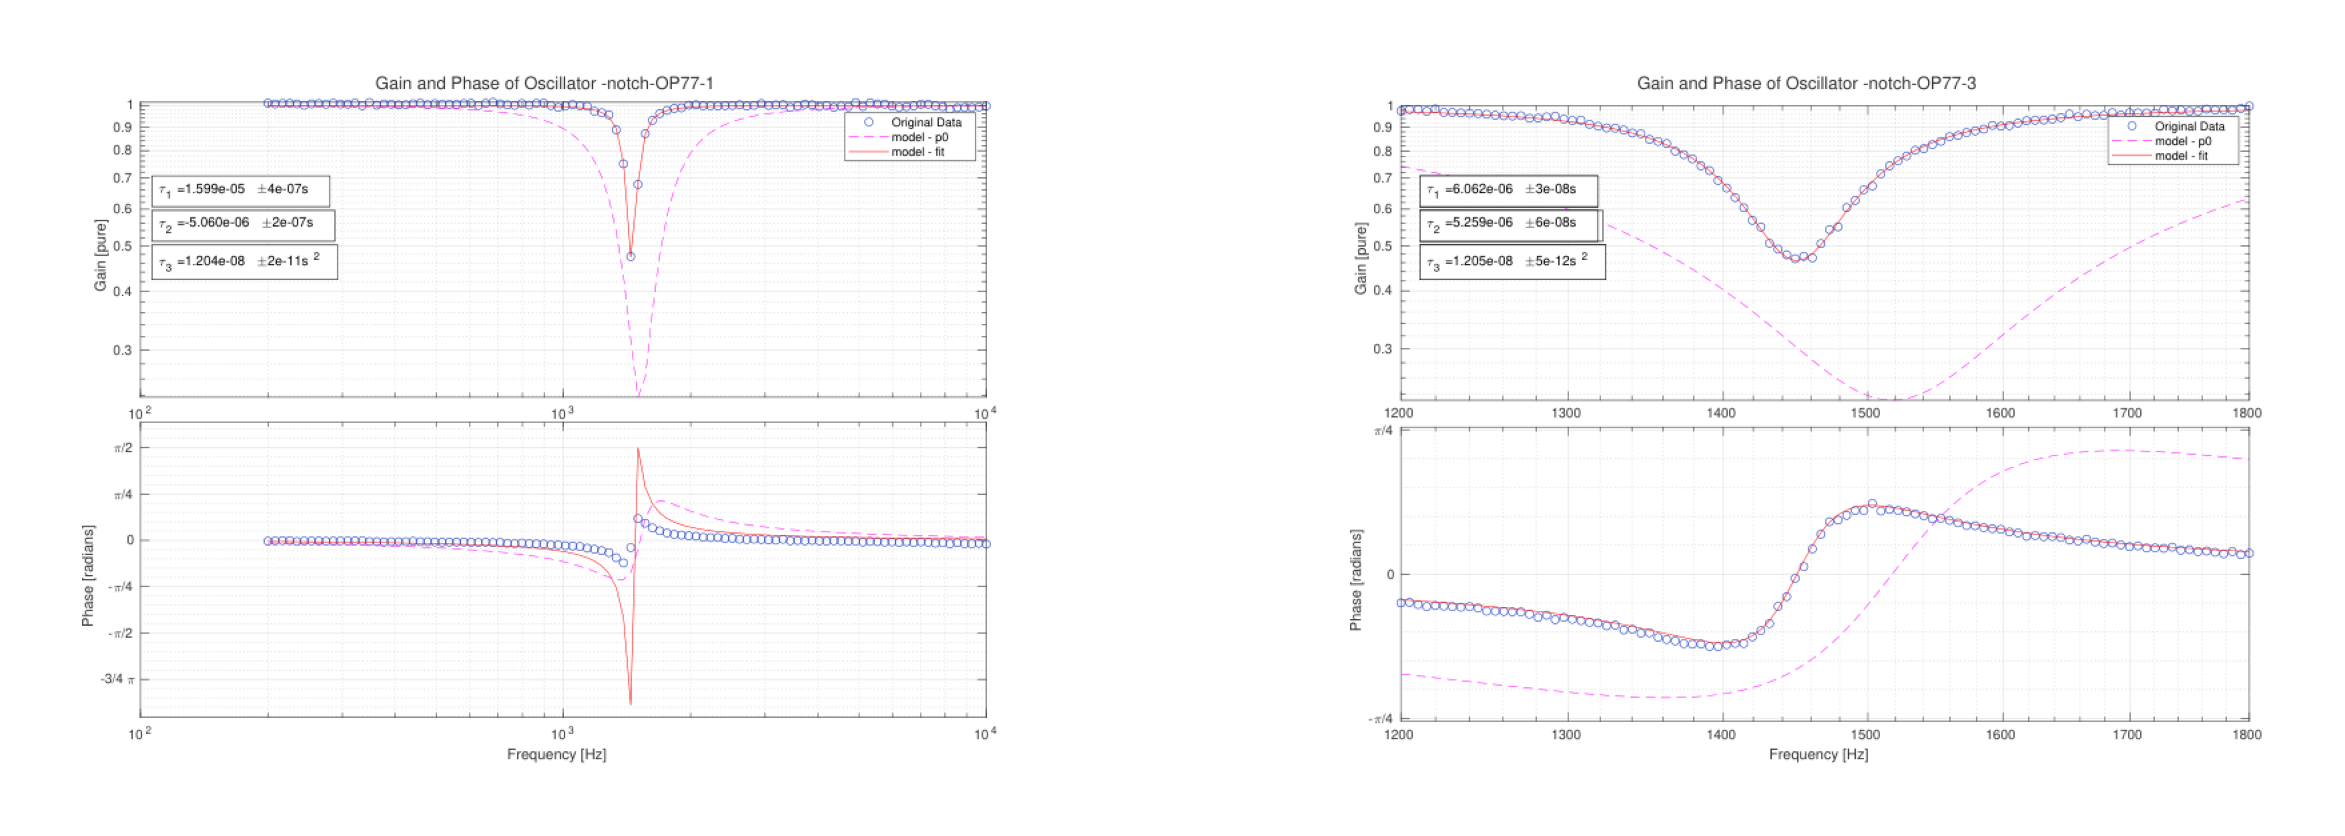

In [ ]:
cols = 2
rows = 1
pdfList = ['Media/Notch/notch-OP77-1.pdf', 'Media/Notch/notch-OP77-3.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)